In [53]:
# Phương pháp hồi quy tuyến tính đơn

In [54]:
# Ví dụ 1:

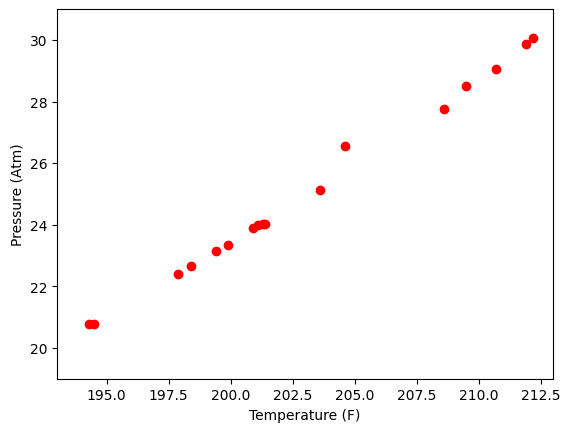

In [55]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()



w =  [[-81.06372713]
 [  0.5228924 ]]


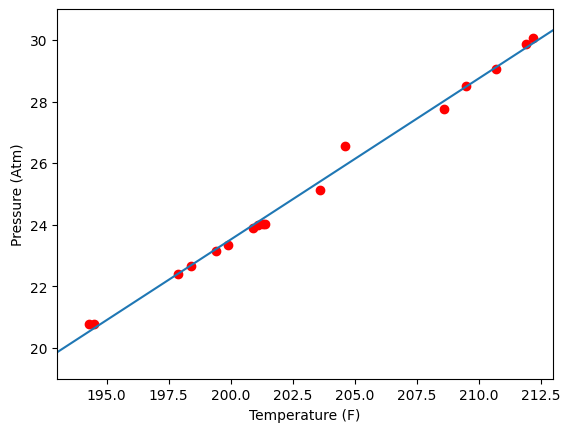

In [56]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [57]:
# Ví dụ 2:

In [58]:
import math
import numpy as np
with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [59]:
# a) Trường hợp sử dụng Numpy – Dùng thuật toán HoldHouse để khai triển QR

In [60]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
print(w)
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

[[154.19284457730757, -4.227983208329615, 0.47187121344198474, -0.006135330970417853, 18.545274506048013]]
           Intercept: 154.19284457730757
                 Tax: -4.227983208329615
                Dlic: 0.47187121344198474
              Income: -0.006135330970417853
            LogMiles: 18.545274506048013


In [61]:
# b) Trường hợp sử dụng thư viện Scikit-Learn

In [62]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression()
# fit_intercept = False for calculating the bias
regr.fit(x_data, y_data)
print(regr.intercept_)
print(regr.coef_)

[154.19284458]
[[-4.22798321e+00  4.71871213e-01 -6.13533097e-03  1.85452745e+01]]


In [63]:
# Ví dụ 3:

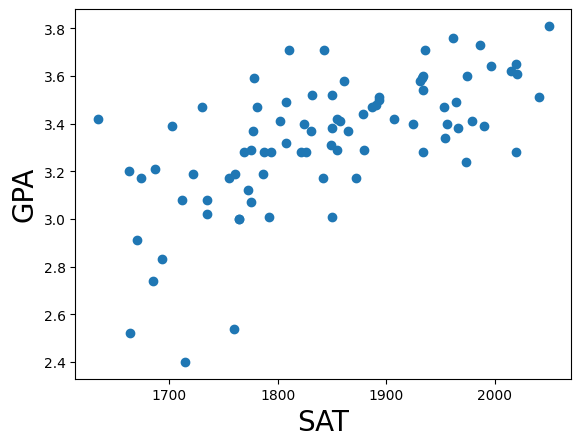

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change to data path on your computer
data = pd.read_csv("SAT_GPA.csv")
# Show the description of data
data.describe()

# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

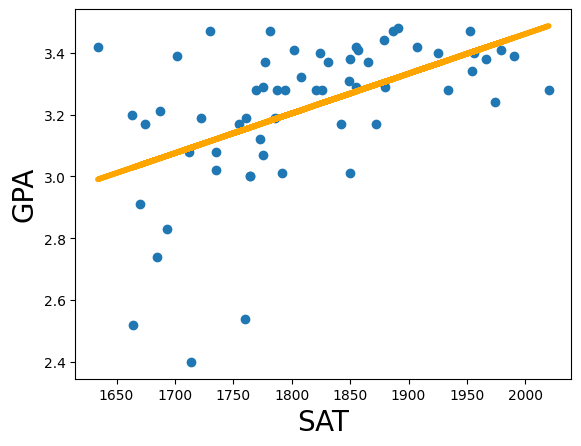

In [65]:
x_train = x[:60]
y_train = y[:60]
x_val = x[60:]
y_val = y[60:]

regr = linear_model.LinearRegression()
x1 = x_train.values.reshape(-1,1)
y1 = y_train.values.reshape(-1,1)
regr.fit(x1,y1)

t_1= regr.coef_
t_0= regr.intercept_

plt.scatter(x1,y1)

yhat = t_1*x1 + t_0

fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [66]:
#Chạy thử mô hình với dữ liệu validation và tính tổng bình phương sai số.

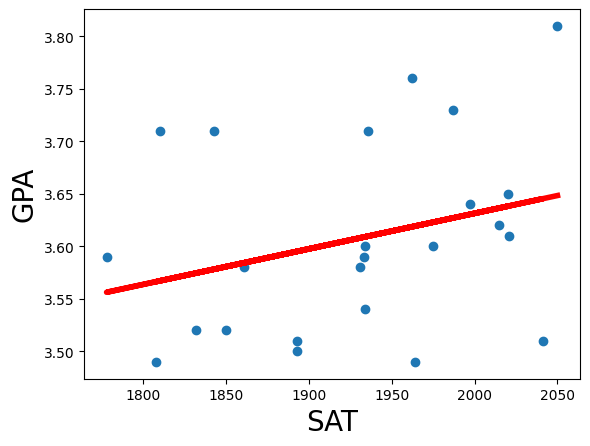

SSR =  0.1773811044050828


In [67]:
regr1 = linear_model.LinearRegression()
x2 = x_val.values.reshape(-1,1)
y2 = y_val.values.reshape(-1,1)
regr1.fit(x2,y2)

t_1= regr1.coef_
t_0= regr1.intercept_

plt.scatter(x2,y2)

yhat = t_1*x2 + t_0

fig = plt.plot(x2,yhat, lw=4, c='red', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

yhat2 = t_1*x2 + t_0
SSR = np.sum((yhat2-y2)**2)
print('SSR = ',SSR)

In [68]:
# Ví dụ 4 (Bài tập 2) a). Xác định hệ số với 100 dữ liệu trên

In [69]:
from sklearn import linear_model
import numpy as np

print('Câu a--------------------------')
#tạo mảng trống chứa phần tử nguyên
id = []
tuoi = []
bmi = []
ha = []
glucose = []
cholesterol = []
bedayntm = []


with open('vidu4_lin_reg.txt') as f:
    #đọc file
    lines = f.readlines()

    #loại bỏ dòng đầu tiên
    lines.pop(0)

    #tạo mảng trống
    arr = []

    #đọc từng dòng
    for line in lines:

        #tách từng dòng thành các phần tử
        arr = line.split()
        id.append(arr[0])
        tuoi.append(arr[1])
        bmi.append(arr[2])
        ha.append(arr[3])
        glucose.append(arr[4])
        cholesterol.append(arr[5])
        bedayntm.append(arr[6])

#tạo mô hình hồi quy tuyến tính
regr = linear_model.LinearRegression()

model = [[float(tuoi[i]), float(cholesterol[i]), float(glucose[i]), float(ha[i]), float(bmi[i])] for i in range(len(tuoi))]

#huấn luyện mô hình
regr.fit(model, bedayntm)

#dự đoán
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('Phương trình hồi quy:\n Bề dày TNM = ', regr.coef_[0], '*tuoi + ', regr.coef_[1], '*cholesterol + ', regr.coef_[2], '*glucose + ', regr.coef_[3], '*ha + ', regr.coef_[4], '*bmi + ', regr.intercept_)


Câu a--------------------------
Coefficients: 
 [ 0.00994694  0.03847025  0.0076701   0.00218137 -0.00020655]
Intercept: 
 -0.10802908119386867
Phương trình hồi quy:
 Bề dày TNM =  0.009946940947109857 *tuoi +  0.03847024823970335 *cholesterol +  0.007670101694229995 *glucose +  0.0021813669452475093 *ha +  -0.0002065477013340239 *bmi +  -0.10802908119386867


In [70]:
#b) Chia dữ liệu thành: 80 dòng đầu dùng cho training; 20 dòng sau dùng cho testing. Tính lại các hệ số với bộ dữ liệu này, 
#sau đó chạy thử trên bộ dữ liệu test và tính các đại lượng kỳ vọng, phương sai của sai số.

In [71]:
print('Câu b--------------------------')

#chia dữ liệu thành 2 phần: 80 dòng đầu dùng cho training
id_train = id[:80]
tuoi_train = tuoi[:80]
bmi_train = bmi[:80]
ha_train = ha[:80]
glucose_train = glucose[:80]
cholesterol_train = cholesterol[:80]
bedayntm_train = bedayntm[:80]

#20 dòng sau dùng cho testing
id_test = id[80:]
tuoi_test = tuoi[80:]
bmi_test = bmi[80:]
ha_test = ha[80:]
glucose_test = glucose[80:]
cholesterol_test = cholesterol[80:]
bedayntm_test = bedayntm[80:]

#tạo mô hình hồi quy tuyến tính trên bộ dữ liệu training
model_train = [[float(tuoi_train[i]), float(cholesterol_train[i]), float(glucose_train[i]), float(ha_train[i]), float(bmi_train[i])] for i in range(len(tuoi_train))]

#tạo mô hình hồi quy tuyến tính tren bộ dữ liệu testing
model_test = [[float(tuoi_test[i]), float(cholesterol_test[i]), float(glucose_test[i]), float(ha_test[i]), float(bmi_test[i])] for i in range(len(tuoi_test))]

#huấn luyện mô hình
regr.fit(model_train, bedayntm_train)


#dự đoán
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('Phương trình hồi quy:\n Bề dày TNM = ', regr.coef_[0], '*tuoi + ', regr.coef_[1], '*cholesterol + ', regr.coef_[2], '*glucose + ', regr.coef_[3], '*ha + ', regr.coef_[4], '*bmi + ', regr.intercept_)
print('Dự đoán bề dày TNM cho 20 dòng dữ liệu còn lại:')
print(regr.predict(model_test))


#Tính các đại lượng kỳ vọng, phương sai của sai số
#tính sai số
sai_so = []
for i in range(len(bedayntm_test)):
    sai_so.append(float(bedayntm_test[i]) - regr.predict(model_test)[i])

#tính đại lượng kỳ vọng
ky_vong = np.mean(sai_so)
print('Đại lượng kỳ vọng của sai số: ', ky_vong)

#tính phương sai
phuong_sai = np.var(sai_so)
print('Phương sai của sai số: ', phuong_sai)

Câu b--------------------------
Coefficients: 
 [ 0.0089892   0.00708535  0.00808634  0.00260218 -0.00047742]
Intercept: 
 0.04306436410329728
Phương trình hồi quy:
 Bề dày TNM =  0.008989196889296782 *tuoi +  0.007085352341923802 *cholesterol +  0.008086342231978138 *glucose +  0.0026021798675557734 *ha +  -0.0004774242218527437 *bmi +  0.04306436410329728
Dự đoán bề dày TNM cho 20 dòng dữ liệu còn lại:
[0.91012272 0.78452963 1.22339369 0.96085817 0.96836123 1.05009561
 1.19694736 1.0521678  0.9936207  0.68503543 0.78429172 0.77109845
 1.19748204 1.06844174 0.99721921 1.03380704 1.14558205 1.19228584
 1.29236178 1.26252546]
Đại lượng kỳ vọng của sai số:  0.07998861696197093
Phương sai của sai số:  0.22100281283267015


In [72]:
#Ví dụ 5 (Bài tập 3)

In [73]:
#Hãy chia dữ liệu thành phần training với 350 mẫu đầu tiên, phần validation với số mẫu còn lại. Hãy tham
#khảo các bài trên và xây dựng mô hình hồi quy tuyến tính mô tả sự phụ thuộc của Y vào các cột từ X1 đến
#X6. Sau đó hãy chạy dự đoán cho phần dữ liệu validation và đưa ra tổng bình phương sai số của dự đoán.
import pandas as pd

# Đọc dữ liệu từ file csv
data = pd.read_csv('real_estate.csv')
# Hiển thị mô tả dữ liệu
data.describe()

x1 = data['X1 transaction date']
x2 = data['X2 house age']
x3 = data['X3 distance to the nearest MRT station']
x4 = data['X4 number of convenience stores']
x5 = data['X5 latitude']
x6 = data['X6 longitude']
y = data['Y house price of unit area']

# Chia dữ liệu thành phần training với 350 mẫu đầu tiên, phần validation với số mẫu còn lại
x1_train = x1[:350]
x2_train = x2[:350]
x3_train = x3[:350]
x4_train = x4[:350]
x5_train = x5[:350]
x6_train = x6[:350]
y_train = y[:350]

x1_val = x1[350:]
x2_val = x2[350:]
x3_val = x3[350:]
x4_val = x4[350:]
x5_val = x5[350:]
x6_val = x6[350:]
y_val = y[350:]

# Xây dựng mô hình hồi quy tuyến tính mô tả sự phụ thuộc của Y vào các cột từ X1 đến X6
from sklearn.linear_model import LinearRegression

# Xây dựng mô hình hồi quy tuyến tính
regr = LinearRegression()

# Tạo mô hình từ dữ liệu huấn luyện (training data)
model_train = [[x1_train[i], x2_train[i], x3_train[i], x4_train[i], x5_train[i], x6_train[i]] for i in range(len(x1_train))]

# Tạo mô hình từ dữ liệu huấn luyện (validation data)
model_val = [[x1_val[i], x2_val[i], x3_val[i], x4_val[i], x5_val[i], x6_val[i]] for i in range(350,len(x1))]

# Huấn luyện mô hình
regr.fit(model_train, y_train)

# Dự đoán
y_pred = regr.predict(model_val)

# In ra các hệ số hồi quy
print('Coefficients: ', regr.coef_)
# In ra hệ số điều chỉnh
print('Intercept: ', regr.intercept_)

#Dự đoán các giá nhà còn lại
y_pred = regr.predict(model_val)

#In ra các giá nhà dự đoán
print('Dự đoán giá nhà các bất động sản còn lại: ', y_pred)

# Tính tổng bình phương sai số của dự đoán
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
print('Tổng bình phương sai số: ', mse)


Coefficients:  [ 5.40808246e+00 -2.83460787e-01 -4.16272555e-03  1.13481785e+00
  2.56173982e+02 -9.68320052e+00]
Intercept:  -16063.986195525613
Dự đoán giá nhà các bất động sản còn lại:  [40.91832822 33.07904463 26.5142559  36.7265069  31.83938619 49.34459361
 39.84892142 52.89285548 47.7387286  29.32062722 45.43806556 39.74827482
 45.02506528 49.71033441 42.25936827 30.19822648 25.65728223 30.62169177
 40.50132105 27.56417544 43.91066001 44.56013121 38.95831294 44.01571817
 48.49814109 30.39550758 34.27266144 48.86089589 40.24691637 51.50363666
 47.5738015  55.22798861 13.4549133  36.81019635 12.83792605 51.39547891
 40.93904183 31.45142233 34.75746245 39.93224448 44.65193829 31.84683655
 37.9454322  42.82658705 16.32506131 39.23934985 27.64971713 46.06475599
 34.27266144 39.67850406 40.79419278 33.38238315 39.19582777 44.70065917
 46.92184169 36.79275493 49.75918266 26.7299703  32.16109657 14.43848652
 49.7796826  46.95694728 44.35206844 54.02950058]
Tổng bình phương sai số:  65.18